# <u>QUANTIUM PROJECT</u>  
## FIRST OBJECTIVE:  
Conduct A T-Test To Analyze The Difference In The Unit Price Of Rides Between **MAINSTREAM** And **(PREMIUM AND BUDGET)** Groups

## SECOND OBJECTIVE:  
Build Multiple Classification Models To Predict High Spending Customers

### IMPORTING PACKAGES

In [1]:
#Imports
#For Dataframes
import pandas as pd
import numpy as np

#For Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#For statistical tests
import scipy.stats as stats

#For machine learning
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
#Import Databases
tdf = r"C:\Users\DELL\OneDrive\Documents\Terminus\Portfolio\04. Quantium Project\QVI_transaction_data.csv"
cdf = r"C:\Users\DELL\OneDrive\Documents\Terminus\Portfolio\04. Quantium Project\QVI_purchase_behaviour.csv"
transactiondf = pd.read_csv(tdf)
customerdf = pd.read_csv(cdf)

#EDA
print('DATA EXPLORATION \nShape Of Transaction Dataframe: {} \nSize of Transaction Dataframe: {} \nTransaction Dataframe Total Count Of Missing Values: {} \n'.format(transactiondf.shape,transactiondf.size,transactiondf.isnull().sum().sum()))
transactiondf.info()
transactiondf.head(5)

DATA EXPLORATION 
Shape Of Transaction Dataframe: (264836, 8) 
Size of Transaction Dataframe: 2118688 
Transaction Dataframe Total Count Of Missing Values: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.2+ MB


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,10/17/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,9/16/2018,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,3/7/2019,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,3/8/2019,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,11/2/2018,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9


In [3]:
#Selecting only entries with chips
chipsdf = transactiondf[transactiondf['PROD_NAME'].str.contains('Chips|Chp')]

#Viewing all chip types
print(chipsdf.groupby('PROD_NAME')[['PROD_NAME']].value_counts(),'\n')
chipsdf[["PROD_NBR","PROD_QTY","TOT_SALES"]].describe() #Generating descriptive statistics 

PROD_NAME
Cobs Popd Sea Salt  Chips 110g              3265
Cobs Popd Sour Crm  &Chives Chips 110g      3159
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Dorito Corn Chp     Supreme 380g            3185
Doritos Corn Chips  Cheese Supreme 170g     3217
Doritos Corn Chips  Nacho Cheese 170g       3160
Doritos Corn Chips  Original 170g           3121
French Fries Potato Chips 175g              1418
Kettle Tortilla ChpsBtroot&Ricotta 150g     3146
Kettle Tortilla ChpsFeta&Garlic 150g        3138
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Smiths Crinkle Chips Salt & Vinegar 330g    3197
Smiths Crinkle Cut  Chips Barbecue 170g     1489
Smiths Crinkle Cut  Chips Chicken 170g      1484
Smiths Crinkle Cut  Chips Chs&Onion170g     1481
Smiths Crinkle Cut  Chips Original 170g     1461
Thins Chips         Originl saltd 175g      1441
Thins Chips Light&  Tangy 175g              3188
Thins Chips Salt &  Vinegar 175g            3103
Thins Chips Seasonedchicken 175g            3114
Thins Pota

,PROD_NBR,PROD_QTY,TOT_SALES
count,62535.000000,62535.000000,62535.000000
mean,44.503590,1.914720,7.367530
std,32.463517,1.169873,4.399138
min,1.000000,1.000000,1.900000
25%,16.000000,2.000000,5.800000
50%,40.000000,2.000000,7.600000
75%,75.000000,2.000000,8.800000
max,110.000000,200.000000,650.000000


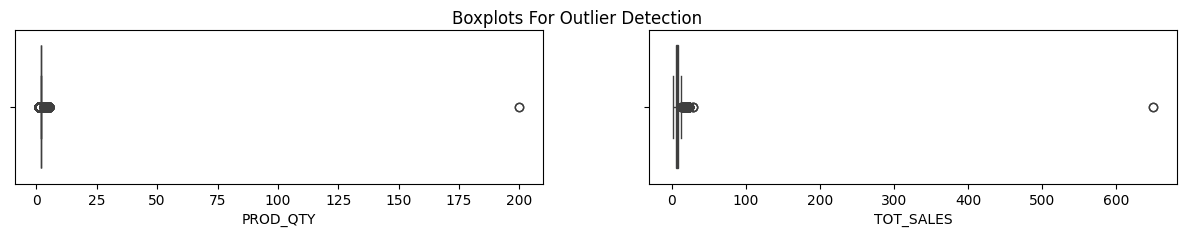

In [4]:
#checking for outliers in prod_qty and tot sales via box plot
fig, axes = plt.subplots(1, 2, figsize=(15, 2))
fig.suptitle('Boxplots For Outlier Detection')
sns.boxplot(ax=axes[0], x=chipsdf['PROD_QTY'])
sns.boxplot(ax=axes[1], x=chipsdf['TOT_SALES'])
plt.show();

In [5]:
#Viewing outliers
chipsdf[chipsdf['TOT_SALES'] >= 600]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
221625,8/19/2018,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
221626,5/20/2019,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [6]:
#Removing outlier
chipsdf = chipsdf[chipsdf['TOT_SALES'] < 100]
chipsdf[["PROD_NBR","PROD_QTY","TOT_SALES"]].describe()

,PROD_NBR,PROD_QTY,TOT_SALES
count,62533.000000,62533.000000,62533.000000
mean,44.504885,1.908384,7.346977
std,32.463228,0.337105,2.478735
min,1.000000,1.000000,1.900000
25%,16.000000,2.000000,5.800000
50%,40.000000,2.000000,7.600000
75%,75.000000,2.000000,8.800000
max,110.000000,5.000000,28.500000


In [7]:
# Get unique dates and their counts
chipsdf["DATE"] = pd.to_datetime(chipsdf["DATE"])
chipsdf["DATE"].value_counts().head()

DATE
2018-12-24    229
2018-12-19    221
2018-12-23    219
2019-06-14    209
2018-07-07    205
Name: count, dtype: int64

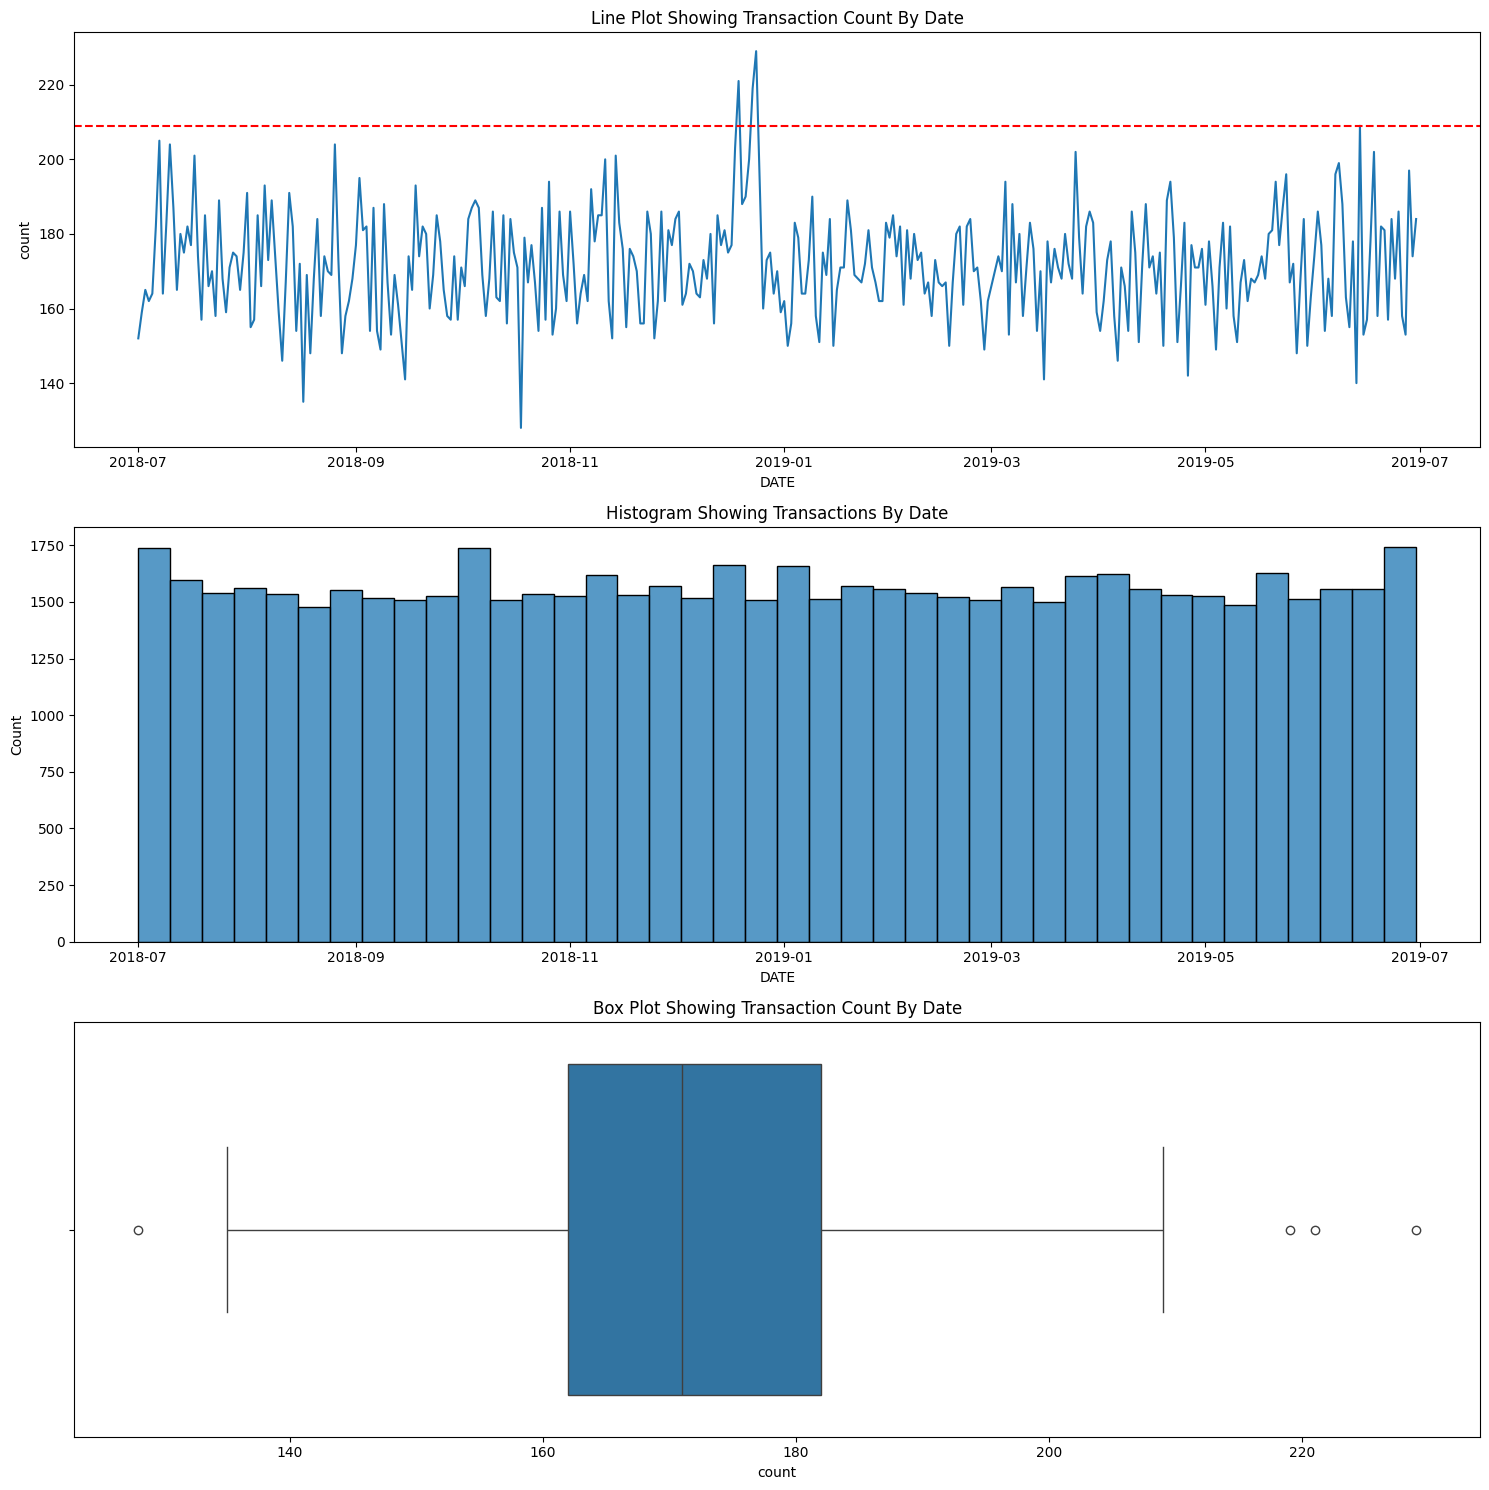

In [8]:
# Creating a visualization of transaction dates
fig, ax = plt.subplots(3,1, figsize=(15,15))
sns.lineplot(data=chipsdf["DATE"].value_counts(), legend=False, ax=ax[0])
sns.histplot(x=chipsdf["DATE"], ax=ax[1])
sns.boxplot(x=chipsdf["DATE"].value_counts(), ax=ax[2])
#Designating outliers in first plot
ax[0].axhline(chipsdf["DATE"].value_counts().quantile(0.9917), color='r', linestyle='--')
#Naming subplots
ax[0].set_title('Line Plot Showing Transaction Count By Date')
ax[1].set_title('Histogram Showing Transactions By Date')
ax[2].set_title('Box Plot Showing Transaction Count By Date')
#Tightening layout
plt.tight_layout()

In [9]:
#checking dates with highest values
chipsdf["DATE"].value_counts().loc[chipsdf["DATE"].value_counts() > 210]

DATE
2018-12-24    229
2018-12-19    221
2018-12-23    219
Name: count, dtype: int64

### CONCLUSION
THERE WAS INCREASE IN SALES LEADING UP TO CHRISTMAS

In [10]:
# creating a list of all product sizes
transactiondf['SIZE'] = transactiondf['PROD_NAME'].str.extract(r'(\d+)')
transactiondf['SIZE'] = transactiondf['SIZE'].astype(int)
print(transactiondf['SIZE'].info(),'\n')
transactiondf.head(5)

<class 'pandas.core.series.Series'>
RangeIndex: 264836 entries, 0 to 264835
Series name: SIZE
Non-Null Count   Dtype
--------------   -----
264836 non-null  int64
dtypes: int64(1)
memory usage: 2.0 MB
None 



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE
0,10/17/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,9/16/2018,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150
2,3/7/2019,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210
3,3/8/2019,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175
4,11/2/2018,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,160


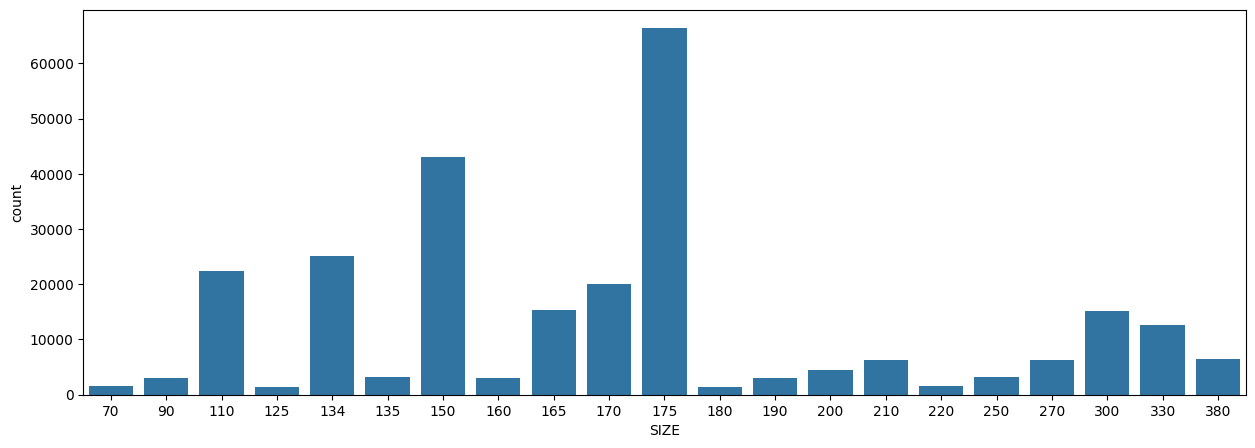

In [11]:
#Creating copy of transaction dataset for diagram
plt.figure(figsize=(15,5))
sns.barplot(transactiondf['SIZE'].value_counts())
plt.show()

In [12]:
# Extract the first word from the productname column to create a new column 
transactiondf['BRANDS'] = transactiondf['PROD_NAME'].str.split().str[0]
transactiondf.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE,BRANDS
0,10/17/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,9/16/2018,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,Red
2,3/7/2019,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,Grain
3,3/8/2019,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,Natural
4,11/2/2018,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,160,WW


In [13]:
#Viewing all product names
transactiondf.groupby('BRANDS', as_index=False)['BRANDS'].value_counts()

,BRANDS,count
0,Burger,1564
1,CCs,4551
2,Cheetos,2927
3,Cheezels,4603
4,Cobs,9693
5,Dorito,3185
6,Doritos,24962
7,French,1418
8,Grain,6272
9,GrnWves,1468


In [14]:
#Correcting typos
transactiondf['BRANDS'] = transactiondf['BRANDS'].replace('RRD', 'Red')
transactiondf['BRANDS'] = transactiondf['BRANDS'].replace('Infzns', 'Infuzions')
transactiondf['BRANDS'] = transactiondf['BRANDS'].replace('Dorito', 'Doritos')
transactiondf['BRANDS'] = transactiondf['BRANDS'].replace('Smith', 'Smiths')
transactiondf['BRANDS'] = transactiondf['BRANDS'].replace('Snbts', 'Sunbites')
transactiondf['BRANDS'] = transactiondf['BRANDS'].replace('WW', 'Woolworths')
transactiondf['BRANDS'] = transactiondf['BRANDS'].replace('Natural', 'NCC')
transactiondf['BRANDS'] = transactiondf['BRANDS'].replace('Grain', 'GrnWves')

#Viewing all product names
transactiondf.groupby('BRANDS', as_index=False)['BRANDS'].value_counts()

,BRANDS,count
0,Burger,1564
1,CCs,4551
2,Cheetos,2927
3,Cheezels,4603
4,Cobs,9693
5,Doritos,28147
6,French,1418
7,GrnWves,7740
8,Infuzions,14201
9,Kettle,41288


In [15]:
#EDA
print('DATA EXPLORATION \nShape Of Customer Dataframe: {} \nSize of Customer Dataframe: {} \nCustomer Dataframe Total Count Of Missing Values: {} \n'.
      format(customerdf.shape,
             customerdf.size,
             customerdf.isnull().sum().sum()))

print(customerdf.info(),'\n')
customerdf.head(5)

DATA EXPLORATION 
Shape Of Customer Dataframe: (72637, 3) 
Size of Customer Dataframe: 217911 
Customer Dataframe Total Count Of Missing Values: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None 



,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [16]:
#Joining customer and transaction dataframes
df = transactiondf.copy()
df['LIFESTAGE'] = customerdf['LIFESTAGE']
df['PREMIUM_CUSTOMER'] = customerdf['PREMIUM_CUSTOMER']

#EDA
print('DATA EXPLORATION \nShape Of Dataframe Pre Cleaning: {} \nSize of Dataframe Pre Cleaning: {}'.
      format(df.shape,
             df.size))

df = df.dropna()
print('\nShape Of Dataframe Post Cleaning: {} \nSize of Dataframe Post Cleaning: {}'.
      format(df.shape,
             df.size))

print('\nChecking For Nulls: \n{}'.
      format(df.isnull().sum()))
df.head(3)

DATA EXPLORATION 
Shape Of Dataframe Pre Cleaning: (264836, 12) 
Size of Dataframe Pre Cleaning: 3178032

Shape Of Dataframe Post Cleaning: (72637, 12) 
Size of Dataframe Post Cleaning: 871644

Checking For Nulls: 
DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
SIZE                0
BRANDS              0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE,BRANDS,LIFESTAGE,PREMIUM_CUSTOMER
0,10/17/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NCC,YOUNG SINGLES/COUPLES,Premium
1,9/16/2018,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,Red,YOUNG SINGLES/COUPLES,Mainstream
2,3/7/2019,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GrnWves,YOUNG FAMILIES,Budget


### DATA VISUALIZATION

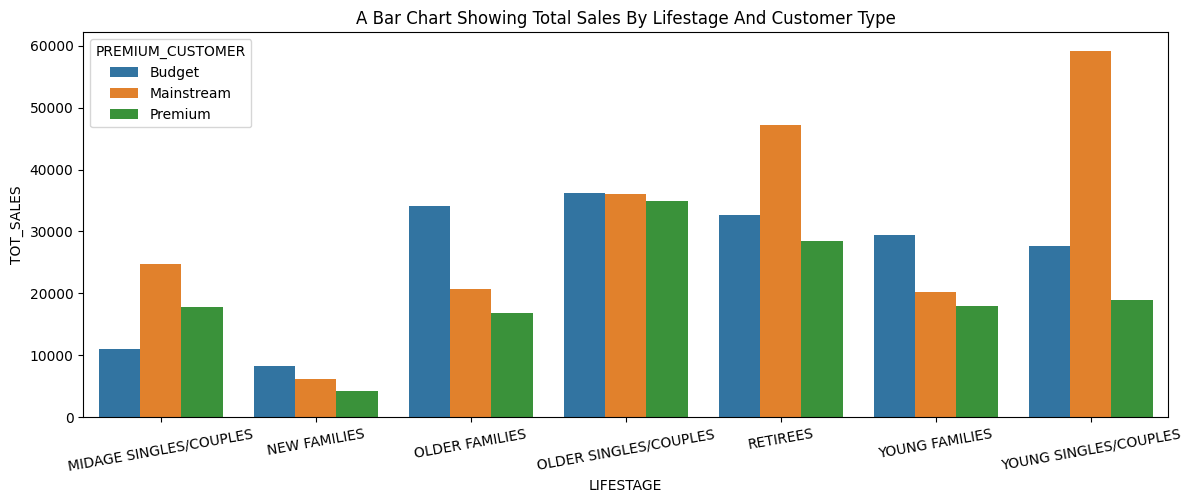

In [17]:
#Creating datafraame
sales_df = df.groupby(by=['LIFESTAGE','PREMIUM_CUSTOMER'], as_index=False)[['TOT_SALES']].sum()

#Creating a bar graph of Total Sales By Lifestage Customer Type
plt.figure(figsize=(14,5))
plt.xticks(rotation=10)
plt.title("A Bar Chart Showing Total Sales By Lifestage And Customer Type")
sns.barplot(data=sales_df, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.show()

#### OBSERVATION
SALES ARE COMING MAINLY FROM BUDGET - OLDER FAMILIES, MAINSTREAM - YOUNG SINGLES/COUPLES, AND MAINSTREAM - RETIREES.

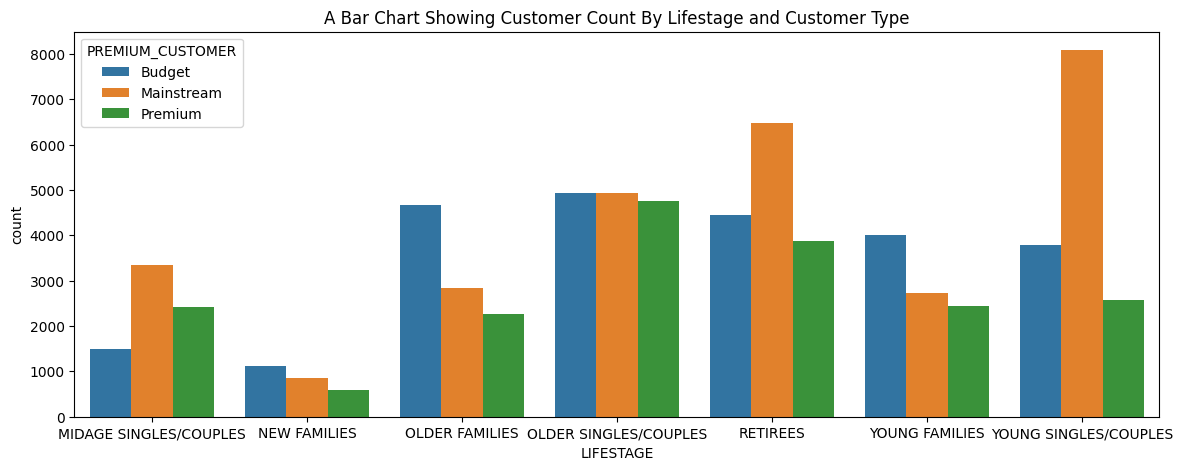

In [18]:
#Creating dataframe
premium_df = df.groupby(by=['LIFESTAGE','PREMIUM_CUSTOMER'], as_index=False)[['PREMIUM_CUSTOMER']].value_counts()

#Creating a bar graph of Customer Count By Lifestage and Customer Type
plt.figure(figsize=(14,5))
sns.barplot(data=premium_df, x='LIFESTAGE', y='count', hue='PREMIUM_CUSTOMER')
plt.title("A Bar Chart Showing Customer Count By Lifestage and Customer Type")
plt.show()

#### OBSERVATION
THERE ARE MORE MAINSTREAM - YOUNG SINGLES/COUPLES AND MAINSTREAM - RETIREES WHO BUY CHIPS. THIS CONTRIBUTES TO THERE BEING MORE SALES TO THESE CUSTOMER SEGMENTS BUT THIS IS NOT A MAJOR DRIVER FOR THE BUDGET - OLDER FAMILIES SEGMENT.

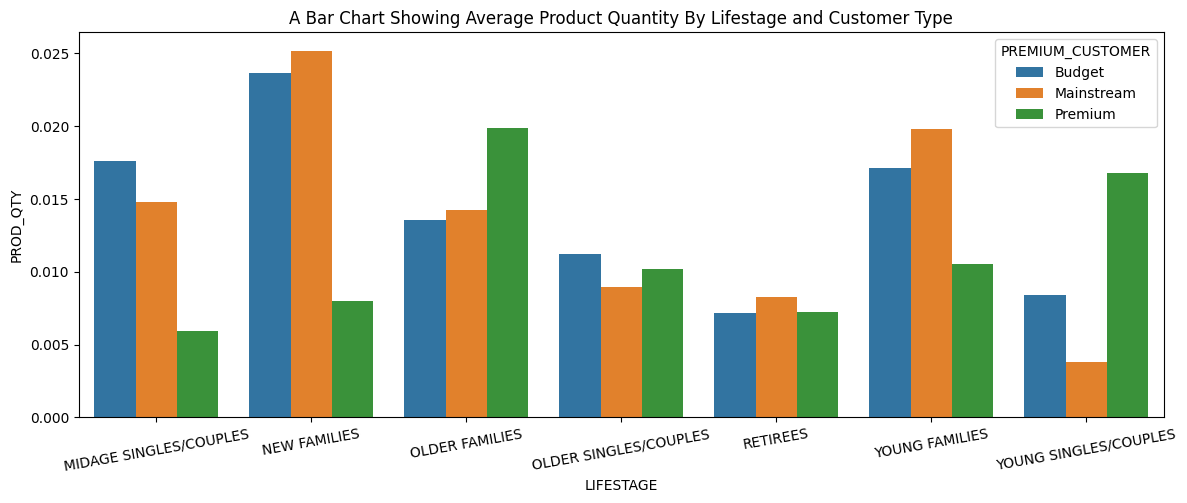

In [19]:
#Creating dataframe
prod_df = df.groupby(by=['LIFESTAGE','PREMIUM_CUSTOMER'], as_index=False)[['PROD_QTY']].mean()
prod_df['PROD_QTY'] = prod_df['PROD_QTY'] - 1.89

#Creating a bar graph of average product quantity By Lifestage and Customer Type
plt.figure(figsize=(14,5))
sns.barplot(data=prod_df, x='LIFESTAGE', y='PROD_QTY', hue='PREMIUM_CUSTOMER')
plt.xticks(rotation=10)
plt.title("A Bar Chart Showing Average Product Quantity By Lifestage and Customer Type")
plt.show()

#### OBSERVATION
OLDER FAMILIES AND YOUNG FAMILIES IN GENERAL BUY MORE CHIPS PER CUSTOMER.

In [20]:
#Creating unit price column
df0 = df.copy()
df0['TOT_SALES'] = df0['TOT_SALES'].astype(float)
df0['PROD_QTY'] = df0['PROD_QTY'].astype(float)
df['UNIT_PRICE'] = df0['TOT_SALES'] / df0['PROD_QTY']
df['UNIT_PRICE'][:5]

0    3.0
1    2.7
2    3.6
3    3.0
4    1.9
Name: UNIT_PRICE, dtype: float64

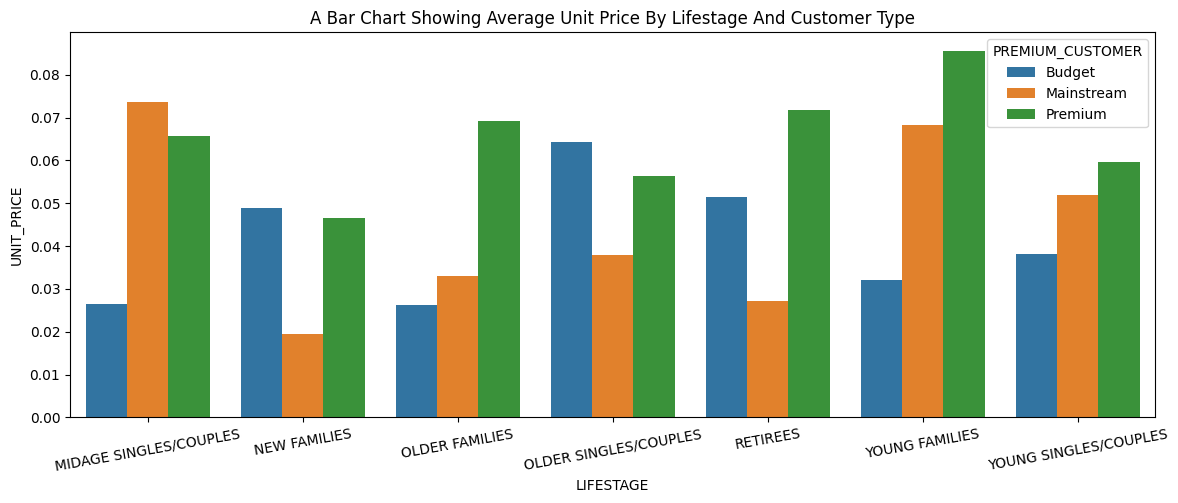

In [21]:
#Creating data frame
price_df = df.groupby(by=['LIFESTAGE','PREMIUM_CUSTOMER'], as_index=False)[['UNIT_PRICE']].mean()
price_df['UNIT_PRICE'] = price_df['UNIT_PRICE'] - 3.8

#Creating a bar graph of Average unit price By Lifestage And Customer Type
plt.figure(figsize=(14,5))
plt.xticks(rotation=10)
sns.barplot(data=price_df, x='LIFESTAGE', y='UNIT_PRICE', hue='PREMIUM_CUSTOMER')
plt.title("A Bar Chart Showing Average Unit Price By Lifestage And Customer Type")
plt.show()

#### OBSERVATION
MAINSTREAM MIDAGE AND YOUNG SINGLES AND COUPLES ARE MORE WILLING TO PAY MORE PER PACKET OF CHIPS COMPARED TO THEIR BUDGET AND PREMIUM COUNTERPARTS. THIS MAY BE DUE TO PREMIUM SHOPPERS BEING MORE LIKELY TO BUY HEALTHY SNACKS AND WHEN THEY BUY CHIPS, THIS IS MAINLY FOR ENTERTAINMENT PURPOSES RATHER THAN THEIR OWN CONSUMPTION. THIS IS ALSO SUPPORTED BY THERE BEING FEWER PREMIUM MIDAGE AND YOUNG SINGLES AND COUPLES BUYING CHIPS COMPARED TO THEIR MAINSTREAM COUNTERPARTS. AS THIS DIFFERENCE IN AVERAGE PRICE PER UNIT ISN'T LARGE, WE CAN CHECK IF THIS DIFFERENCE IS STATISTICALLY DIFFERENT.

## <u>FIRST OBJECTIVE</u>
Conduct A T-Test To Analyze The Difference In The Unit Price Of Rides Between **MAINSTREAM** And **(PREMIUM AND BUDGET)** Groups

**NULL HYPOTHESIS:** There Is **NO** Statistical Difference In The Unit Price Of Rides Between **MAINSTREAM** And **(PREMIUM AND BUDGET)** Groups

**ALTERNATIVE HYPOTHESIS:** There Is **A** Statistical Difference In The Unit Price Of Rides Between **MAINSTREAM** And **(PREMIUM AND BUDGET)** Groups

In [22]:
#Selecting only YOUNG SINGLES/COUPLES and MIDAGE SINGLES/COUPLES
testdf = df[df['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']
                                )][['PREMIUM_CUSTOMER','UNIT_PRICE']]

testdf.head(5)

,PREMIUM_CUSTOMER,UNIT_PRICE
0,Premium,3.0
1,Mainstream,2.7
4,Mainstream,1.9
5,Budget,2.8
7,Mainstream,2.7


In [23]:
#Selecting only unit prices of mainstream customers
mainstream = testdf[testdf['PREMIUM_CUSTOMER'].isin(['Mainstream'])]['UNIT_PRICE']
mainstream.head()

1     2.7
4     1.9
7     2.7
12    5.1
14    2.9
Name: UNIT_PRICE, dtype: float64

In [24]:
#Selecting only unit prices of budget and premium customers
others = testdf[testdf['PREMIUM_CUSTOMER'].isin(['Budget', 'Premium'])]['UNIT_PRICE']
others.head()

0     3.0
5     2.8
16    4.6
17    3.9
19    4.4
Name: UNIT_PRICE, dtype: float64

In [25]:
#Hypothesis Testing
sta, pvalue = stats.ttest_ind(a=mainstream, b=others, equal_var=False)

#Printing conclusion
pvalue = round(pvalue,4)
print(f'Since The pvalue ({pvalue}) > 0.05, We Fail to Reject The Null Hypothesis.')

Since The pvalue (0.5085) > 0.05, We Fail to Reject The Null Hypothesis.


### INSIGHT
There Is No Significant Difference In Unit Prices Among MAINSTREAM AND (PREMIUM AND BUDGET) Groups

## <u>SECOND OBJECTIVE</u>
Build Multiple Classification Models To Predict High Spending Customers (`TOT_SALES`>=10)
1. [x] Feature Eingeering
   1. `CUSTOMER_VALUE` (`TOT_SALES`>=10)
   2.  `BRAND_VALUE` with High, Mid and Low Categories Based On Unit Purchases Of Brands

### FEATURE ENGINEERING

In [26]:
#Generating empty lists
brand = []
unit = []

#Generating function to count unit purchases
for x in df['BRANDS'].unique():
    count_df = df.groupby('BRANDS', as_index=False)[['PROD_QTY']].value_counts()
    count = count_df.loc[count_df['BRANDS'] == x ]
    unit.append(sum(count['PROD_QTY'] * count['count']))
    brand.append(x)

In [27]:
#compiling results into a dataframe
brand_df = pd.DataFrame(data={"BRAND":brand,"COUNT":unit,"VALUE":'MID'})
brand_df = brand_df.sort_values(by='COUNT',ascending=False, ignore_index=True)
brand_df.head()

,BRAND,COUNT,VALUE
0,Kettle,21969,MID
1,Smiths,16169,MID
2,Doritos,14808,MID
3,Pringles,13527,MID
4,Red,8814,MID


In [28]:
#Designating categories in brands_df
brand_df.loc[brand_df['COUNT'] >= brand_df['COUNT'].quantile(0.50), 'VALUE'] = 'LOW'
brand_df.loc[brand_df['COUNT'] >= brand_df['COUNT'].quantile(0.80), 'VALUE'] = 'HIGH'
brand_df.head()

,BRAND,COUNT,VALUE
0,Kettle,21969,HIGH
1,Smiths,16169,HIGH
2,Doritos,14808,HIGH
3,Pringles,13527,HIGH
4,Red,8814,HIGH


In [29]:
#Mapping brand categories onto main dataframe
brand_map = brand_df.set_index('BRAND')['VALUE'].to_dict()
df['BRAND_VALUE'] = df['BRANDS'].map(brand_map)
df.head(2)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE,BRANDS,LIFESTAGE,PREMIUM_CUSTOMER,UNIT_PRICE,BRAND_VALUE
0,10/17/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NCC,YOUNG SINGLES/COUPLES,Premium,3.0,MID
1,9/16/2018,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,Red,YOUNG SINGLES/COUPLES,Mainstream,2.7,HIGH


In [30]:
#Generating a dataframe with purchases per brand and brand value
value_df = pd.DataFrame(df.groupby('BRANDS', as_index=False)[['BRAND_VALUE','BRANDS']].value_counts())
value_df = value_df.sort_values(by='count', ascending=False) #Sorting by count in ascending

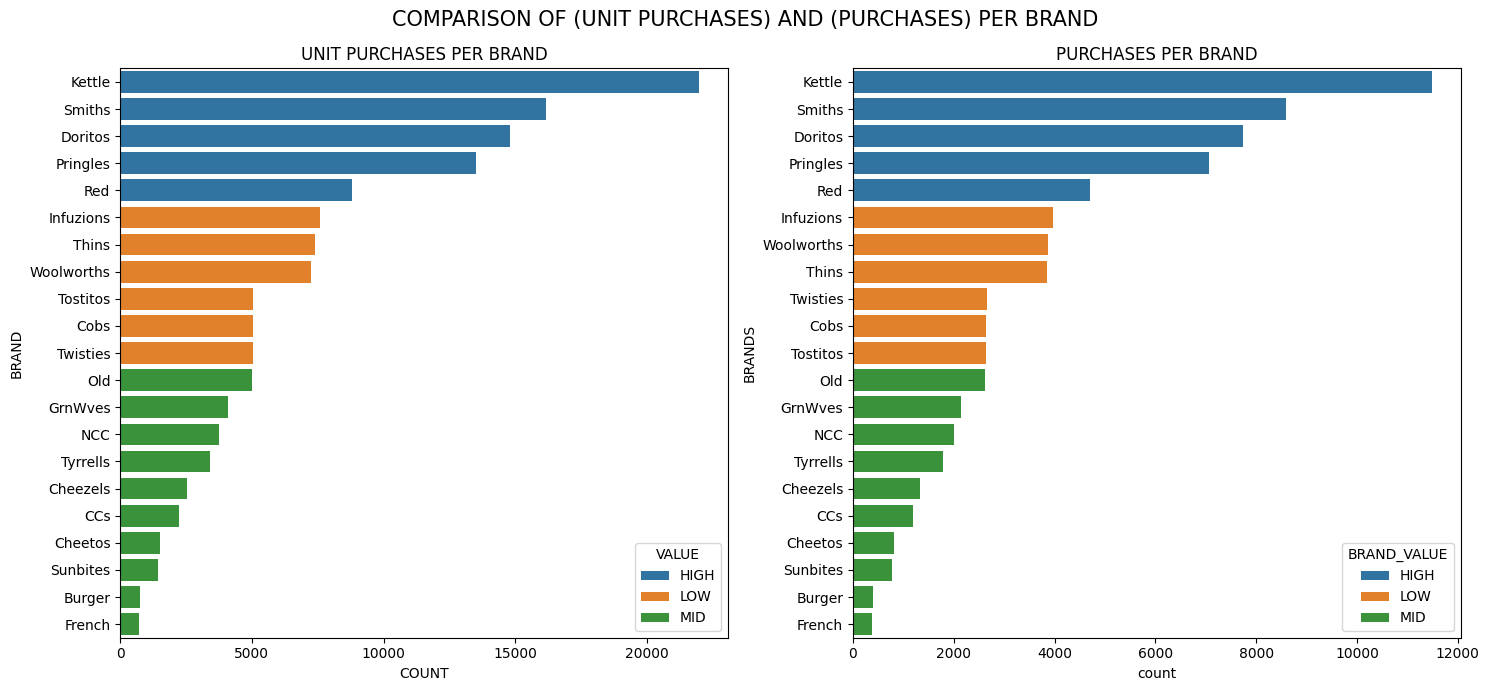

In [31]:
#Generating subplots
fig, ax = plt.subplots(1,2,figsize=(15,7))
plt.suptitle("COMPARISON OF (UNIT PURCHASES) AND (PURCHASES) PER BRAND", fontsize=15)
sns.barplot(data=brand_df, x='COUNT',y='BRAND', hue='VALUE', orient='h', ax=ax[0])
sns.barplot(data=value_df, x='count', y='BRANDS', hue='BRAND_VALUE',orient='h', ax=ax[1])
#Naming subplots
ax[0].set_title("UNIT PURCHASES PER BRAND")
ax[1].set_title("PURCHASES PER BRAND")
plt.tight_layout()

In [32]:
#Generating customer value column
df['CUSTOMER_VALUE'] = 'HIGH'
df.loc[df['TOT_SALES'] < 10,'CUSTOMER_VALUE' ] = 'LOW'
df.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,SIZE,BRANDS,LIFESTAGE,PREMIUM_CUSTOMER,UNIT_PRICE,BRAND_VALUE,CUSTOMER_VALUE
0,10/17/2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NCC,YOUNG SINGLES/COUPLES,Premium,3.0,MID,LOW
1,9/16/2018,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,Red,YOUNG SINGLES/COUPLES,Mainstream,2.7,HIGH,LOW
2,3/7/2019,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GrnWves,YOUNG FAMILIES,Budget,3.6,MID,LOW


### MODEL PREP

In [33]:
#Drop unnecessary columns
df_mod = df.drop(columns=['DATE','STORE_NBR','LYLTY_CARD_NBR','TXN_ID','PROD_NBR','PROD_NAME'])

#Encoding categorical vriables
data = df_mod[['BRANDS','CUSTOMER_VALUE','BRAND_VALUE']]
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) #Defining encoder
encoded_data = encoder.fit_transform(data) #Applying encoder
new_data = pd.DataFrame(data=encoded_data ,columns=encoder.get_feature_names_out()) #Generating a dataframe out of encoded data
df_mod = df_mod.drop(columns=['BRANDS','LIFESTAGE','PREMIUM_CUSTOMER','CUSTOMER_VALUE','BRAND_VALUE'], axis=1)
df_mod = pd.concat([df_mod, new_data], axis=1)

In [34]:
#Preview
print(df_mod.info())
df_mod.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 72637 entries, 0 to 72636
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PROD_QTY             72637 non-null  int64  
 1   TOT_SALES            72637 non-null  float64
 2   SIZE                 72637 non-null  int64  
 3   UNIT_PRICE           72637 non-null  float64
 4   BRANDS_Burger        72637 non-null  float64
 5   BRANDS_CCs           72637 non-null  float64
 6   BRANDS_Cheetos       72637 non-null  float64
 7   BRANDS_Cheezels      72637 non-null  float64
 8   BRANDS_Cobs          72637 non-null  float64
 9   BRANDS_Doritos       72637 non-null  float64
 10  BRANDS_French        72637 non-null  float64
 11  BRANDS_GrnWves       72637 non-null  float64
 12  BRANDS_Infuzions     72637 non-null  float64
 13  BRANDS_Kettle        72637 non-null  float64
 14  BRANDS_NCC           72637 non-null  float64
 15  BRANDS_Old           72637 non-null  floa

,PROD_QTY,TOT_SALES,SIZE,UNIT_PRICE,BRANDS_Burger,BRANDS_CCs,BRANDS_Cheetos,BRANDS_Cheezels,BRANDS_Cobs,BRANDS_Doritos,...,BRANDS_Thins,BRANDS_Tostitos,BRANDS_Twisties,BRANDS_Tyrrells,BRANDS_Woolworths,CUSTOMER_VALUE_HIGH,CUSTOMER_VALUE_LOW,BRAND_VALUE_HIGH,BRAND_VALUE_LOW,BRAND_VALUE_MID
0,2,6.0,175,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,2.7,150,2.7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1,3.6,210,3.6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [35]:
#Defining variables
y = df_mod['CUSTOMER_VALUE_HIGH']
X = df_mod.drop(columns=['CUSTOMER_VALUE_HIGH','CUSTOMER_VALUE_LOW','TOT_SALES','UNIT_PRICE','SIZE','PROD_QTY'])

X_train0, X_test, y_train0, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train0, y_train0, test_size=0.5, random_state=42) 

split = pd.DataFrame(data={"Dimensiions":[X_train0.shape,X_val.shape,X_test.shape,y_train0.size,y_val.size,y_test.size]},
                     index=['X TRAIN','X VAL','X TEST','Y TRAIN','Y VAL','Y TEST'])
split

,Dimensiions
X TRAIN,"(50845, 24)"
X VAL,"(25423, 24)"
X TEST,"(21792, 24)"
Y TRAIN,50845
Y VAL,25423
Y TEST,21792


### INITIALIZING BASE MODELS

In [36]:
#Defining first model
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

#Defining second model
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

#Defining third model
xgb = XGBClassifier(objective = 'binary:logistic', random_state=42)
xgb.fit(X_train, y_train)

print('CLASSIFICATION MODELS READY')

CLASSIFICATION MODELS READY


In [37]:
#Generating empty lists to store results 
Model = []
Accuracy = []
Precision = []
Recall = []
F1_Score = []
ROC_AUC = []

In [38]:
def results():
    results = pd.DataFrame(data={'Accuracy' : Accuracy,
                                 'Precision' : Precision,
                                 'Recall' : Recall,
                                 'F1 Score' : F1_Score,
                                 'ROC AUC' : ROC_AUC},
                           index=Model)
    return results

In [39]:
def resultify(name:str, pred, test):
    # name = Prediction Name, pred = predicted values, test = testing values
    #Generating evaluation values
    accuracy_value = round(accuracy_score(pred, test)*100,0)
    precision_value = round(precision_score(pred, test)*100,0)
    recall_value = round(recall_score(pred, test)*100,0)
    f1_value = round(f1_score(pred, test)*100,0)
    roc_auc_value = round(roc_auc_score(pred, test)*100,0)
    
    #Appending values to list
    Model.append(name)
    Accuracy.append(f'{accuracy_value}%')
    Precision.append(f'{precision_value}%')
    Recall.append(f'{recall_value}%')
    F1_Score.append(f'{f1_value}%')
    ROC_AUC.append(f'{roc_auc_value}%')

### VALIDATION SPLIT PREDICTIONS

In [40]:
rfc_val_pred = rfc.predict(X_val)
resultify("Random Forest Val", rfc_val_pred, y_val)

gbc_val_pred = gbc.predict(X_val)
resultify("Gradient Boosting Val", gbc_val_pred, y_val)

xgb_val_pred = xgb.predict(X_val)
resultify("X Gradient Boosting Val", xgb_val_pred, y_val)

### TEST SPLIT PREDICTIONS

In [41]:
rfc_test_pred = rfc.predict(X_test)
resultify("Random Forest Test", rfc_test_pred, y_test)

gbc_test_pred = gbc.predict(X_test)
resultify("Gradient Boosting Test", gbc_test_pred, y_test)

xgb_test_pred = xgb.predict(X_test)
resultify("X Gradient Boosting Test", xgb_test_pred, y_test)

### MODEL EVALUATION

In [42]:
results()

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Random Forest Val,86.0%,26.0%,82.0%,39.0%,84.0%
Gradient Boosting Val,86.0%,26.0%,82.0%,39.0%,84.0%
X Gradient Boosting Val,86.0%,26.0%,82.0%,39.0%,84.0%
Random Forest Test,86.0%,25.0%,79.0%,38.0%,83.0%
Gradient Boosting Test,86.0%,25.0%,79.0%,38.0%,83.0%
X Gradient Boosting Test,86.0%,25.0%,79.0%,38.0%,83.0%


### CONFUSION MATRIX

In [43]:
#Defining validation confusion matricies 
rfc_val_cm = confusion_matrix(y_val, rfc_val_pred, normalize="all")*100
gbc_val_cm = confusion_matrix(y_val, gbc_val_pred, normalize="all")*100
xgb_val_cm = confusion_matrix(y_val, xgb_val_pred, normalize="all")*100

#Defining test confusion matricies 
rfc_test_cm = confusion_matrix(y_test, rfc_test_pred, normalize="all")*100
gbc_test_cm = confusion_matrix(y_test, gbc_test_pred, normalize="all")*100
xgb_test_cm = confusion_matrix(y_test, xgb_test_pred, normalize="all")*100

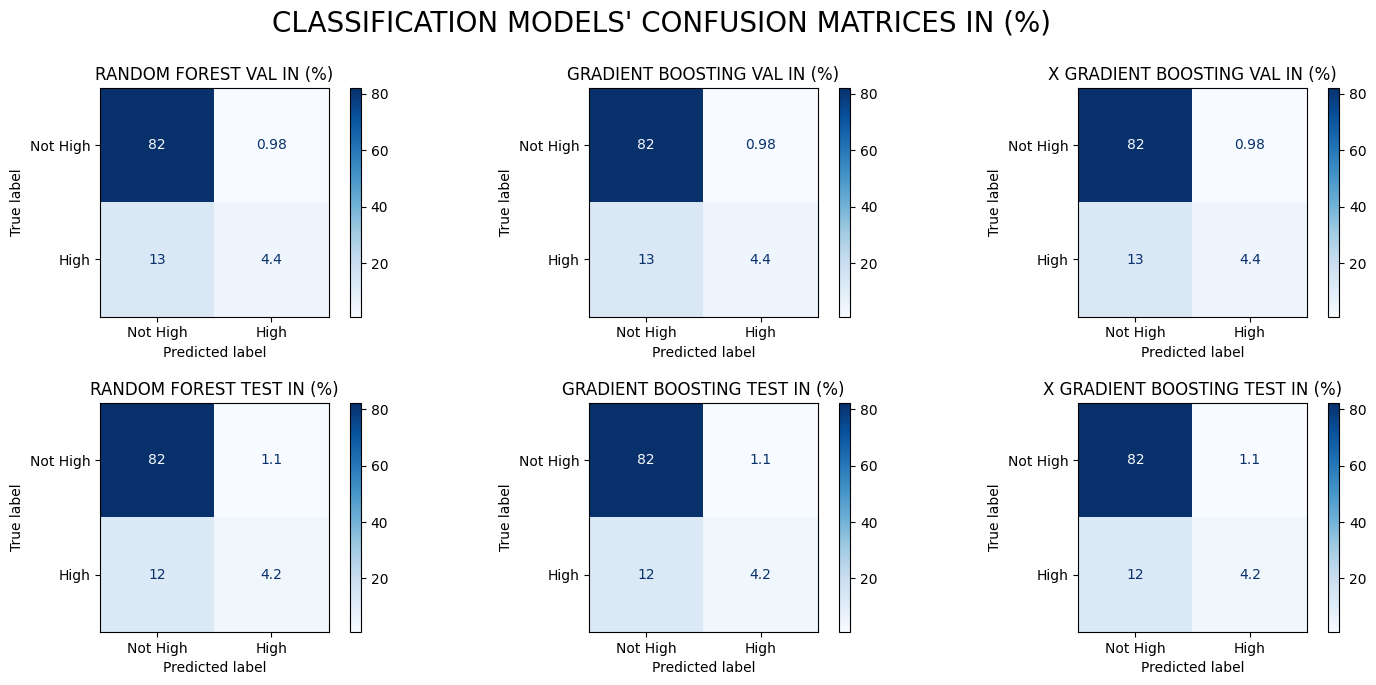

In [44]:
#Generating subplots
fig, ax = plt.subplots(2,3, figsize=(15,7))
plt.suptitle("CLASSIFICATION MODELS' CONFUSION MATRICES IN (%)", fontsize=20)

#Generating Visualizations
ConfusionMatrixDisplay(confusion_matrix=rfc_val_cm, display_labels=['Not High', 'High']).plot(cmap='Blues', ax=ax[0,0])
ConfusionMatrixDisplay(confusion_matrix=gbc_val_cm, display_labels=['Not High', 'High']).plot(cmap='Blues', ax=ax[0,1])
ConfusionMatrixDisplay(confusion_matrix=xgb_val_cm, display_labels=['Not High', 'High']).plot(cmap='Blues', ax=ax[0,2])
ConfusionMatrixDisplay(confusion_matrix=rfc_test_cm, display_labels=['Not High', 'High']).plot(cmap='Blues', ax=ax[1,0])
ConfusionMatrixDisplay(confusion_matrix=gbc_test_cm, display_labels=['Not High', 'High']).plot(cmap='Blues', ax=ax[1,1])
ConfusionMatrixDisplay(confusion_matrix=xgb_test_cm, display_labels=['Not High', 'High']).plot(cmap='Blues', ax=ax[1,2])

#Labelling subplots
ax[0,0].set_title("RANDOM FOREST VAL IN (%)")
ax[0,1].set_title("GRADIENT BOOSTING VAL IN (%)")
ax[0,2].set_title("X GRADIENT BOOSTING VAL IN (%)")
ax[1,0].set_title("RANDOM FOREST TEST IN (%)")
ax[1,1].set_title("GRADIENT BOOSTING TEST IN (%)")
ax[1,2].set_title("X GRADIENT BOOSTING TEST IN (%)")
plt.tight_layout(pad=1.5)

### FEATURE IMPORTANCE

In [45]:
# List of models and their names
models = [rfc, gbc, xgb]
model_names = ['rfc', 'gbc', 'xgb']

# Initialize an empty list to store the dataframes
dfs = []

In [46]:
# Loop through each model
for model, name in zip(models, model_names):
    # Get feature importances and indices
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    # Generate dataframe for feature importances
    df = pd.DataFrame(
        data={'Feature': [X.columns[i] for i in indices],
              'Importance': importances[indices]})
    
    # Append the dataframe to the list
    dfs.append(df)

In [47]:
# Assign the dataframes to variables
rfc_df, gbc_df, xgb_df = dfs

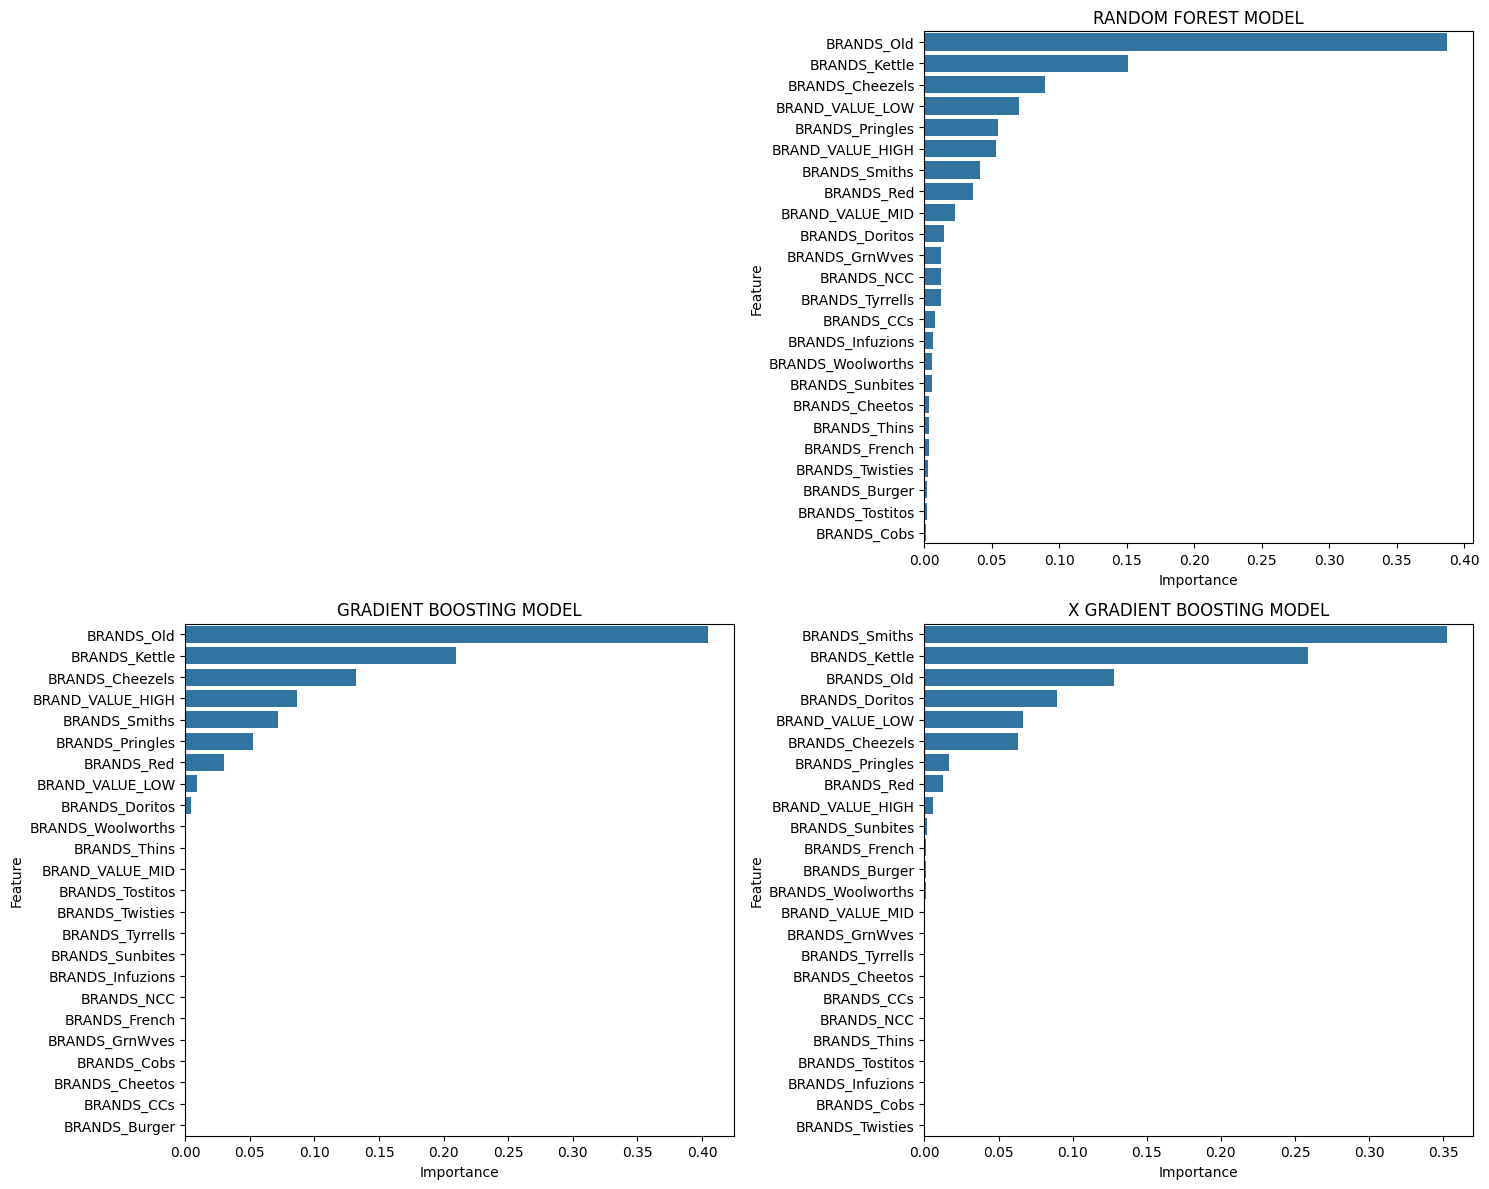

In [48]:
#Generating subplots
fig, ax = plt.subplots(2,2, figsize=(15,12))
ax[0,0].axis('off')
sns.barplot(data=rfc_df, y='Feature', x='Importance', orient='h', ax=ax[0,1])
sns.barplot(data=gbc_df, y='Feature', x='Importance', orient='h', ax=ax[1,0])
sns.barplot(data=xgb_df, y='Feature', x='Importance', orient='h', ax=ax[1,1])
#Naming subplots
ax[0,1].set_title("RANDOM FOREST MODEL")
ax[1,0].set_title("GRADIENT BOOSTING MODEL")
ax[1,1].set_title("X GRADIENT BOOSTING MODEL")
plt.tight_layout()

# PROJECT COMPLETE